In [35]:
from scipy.fftpack import fft,ifft,fftfreq
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
# サンプルデータの作成
fs = 4000.0 # Sampling rate
L = 512 # Signal length
t = np.arange(L)/fs # データの横軸(時間) 

# 440[Hz]と700[Hz]のサイン波を作る。
sin440 = np.sin(2. *np.pi*440. * t)
sin700 = np.sin(2. *np.pi *600. * t)

# サンプルデータ sampData
sampData = sin440 + sin700

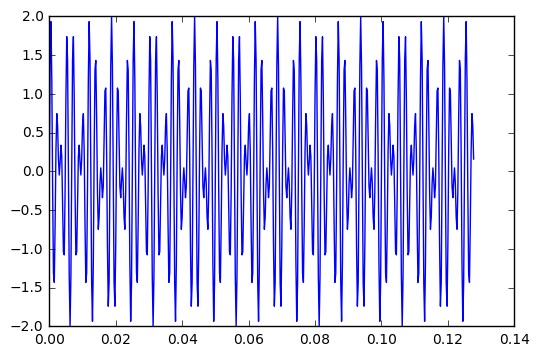

In [37]:
# サンプルのプロット
plt.plot(t,sampData)

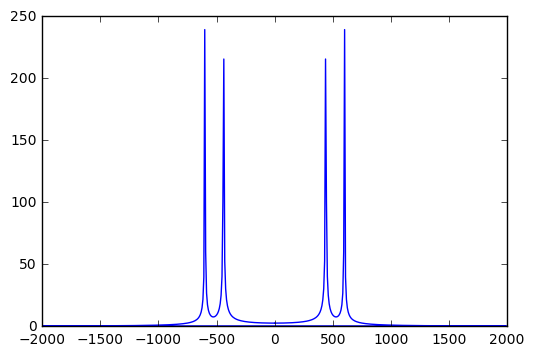

In [38]:
# フーリエ変換 FFT
fftData = fft(sampData)
# 周波数の作成
freq = fftfreq(t.size,t[1]-t[0])

# 絶対値をプロット
plt.plot(freq,np.abs(fftData))

In [72]:
# データを複素数の絶対値と位相に分ける
absData = np.abs(fftData).T
phaseData = np.degrees(np.angle(fftData)).T
# 下で使うサンプルデータとしてファイルを出力しておく
dataArray = np.c_[freq,absData,phaseData]
np.savetxt('sample.txt',np.c_[freq,absData,phaseData])

# 振幅と位相が分かれているデータを逆フーリエ変換

ネットワークアナライザなどでは振幅と位相が分かれて別々の列としてデータがあるのでそのようなサンプルデータを作って
逆フーリエ変換を行ってみる。  
振幅と位相で分かれたデータはexpを使って複素数にまとめてから逆フーリエ変換を行う。
$$z = Ae^{j\phi\pi/180}$$
ネットワークアナライザなどからのデータは位相の単位がdegreeなのでradに変えることを忘れないように

## 逆フーリエ変換の横軸になる時間を作る

ネットワークアナライザでは周波数がデータとしてあるが、逆フーリエ変換のデータは横軸が時間で表されるため、横軸になる時間を作る。fftfreq(時間→周波数)というような関数はないのでiffttime(周波数→時間)を自分で作る。


In [52]:
# 使い方はfftfreqと同じでiffttime(データの数,周波数の幅)
def iffttime(n,df=1.0):
    t= 2*np.arange(n)/(df*2.0*n)
    return t

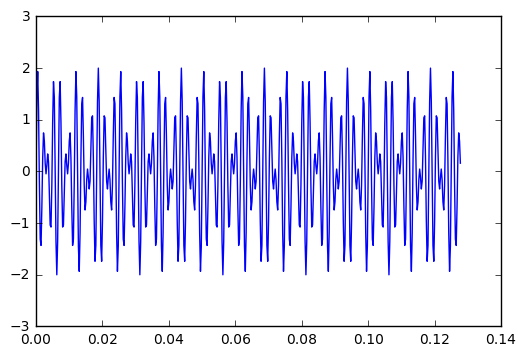

In [56]:
# ネットワークアナライザなどでは上のように２つのデータが入ってくるがこれをまとめるのにexpでまとめる。
compData = absData*np.exp(complex(0,1)*phaseData*np.pi/180.0)

# 逆フーリエ変換
ifftData = ifft(compData)
# 周波数を時間に変える
it = iffttime(freq.size,freq[1]-freq[0])
#結果をプロット
plt.plot(it,ifftData)
#plt.plot(freq,absData)

In [41]:
complex(0,1)

1j

In [71]:
x  = np.arange(0.0,5.0,1.0)
y = np.arange(5)
z = np.arange(0.0,10.0,2.0)
np.savetxt('test.out', (x,y,z))
np.loadtxt('test.out')

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  2.,  4.,  6.,  8.]])